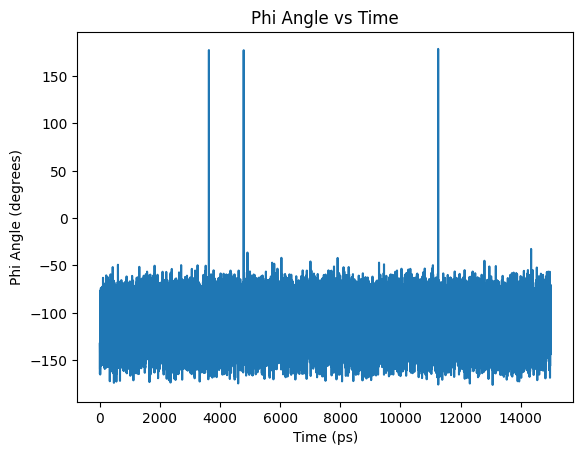

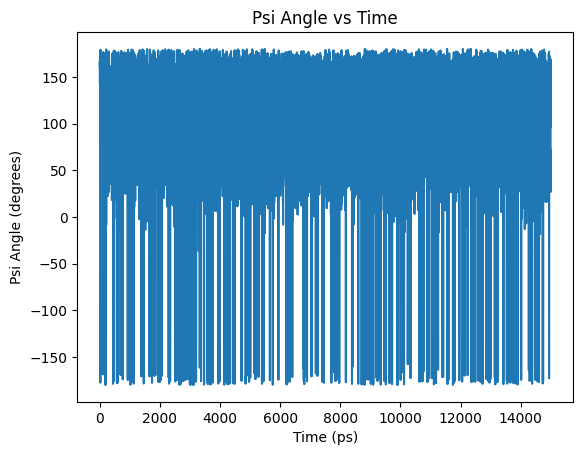

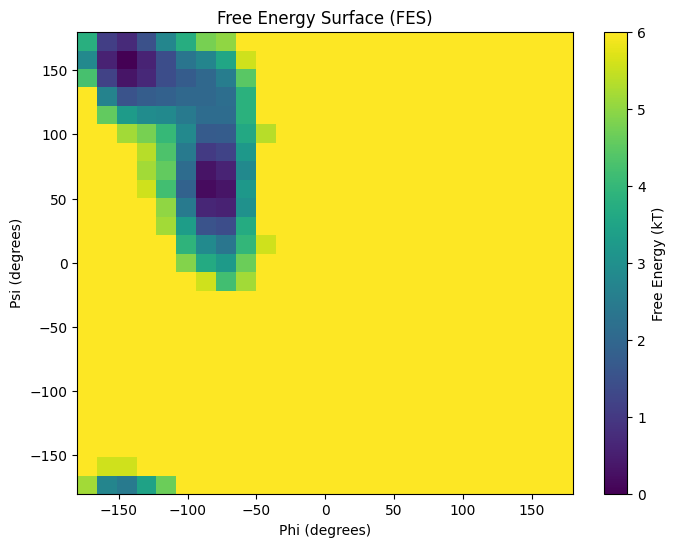

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def compute_fes(traj, bins=25):
    _, phi_angles = md.compute_phi(traj)
    _, psi_angles = md.compute_psi(traj)
    
    phi_angles_deg = np.degrees(phi_angles).flatten()
    psi_angles_deg = np.degrees(psi_angles).flatten()
    
    hist, xedges, yedges = np.histogram2d(phi_angles_deg, psi_angles_deg, bins=bins, range=[[-180, 180], [-180, 180]])
    
    if hist is None or xedges is None or yedges is None:
        print("Histogram computation returned None.")
        return None, None, None
    
    fes = -np.log(hist + 1e-10)  
    fes -= np.min(fes)  
    
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    y_centers = (yedges[:-1] + yedges[1:]) / 2
    
    return fes, x_centers, y_centers

traj = md.load("adp.xtc", top="adp.gro")

phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

phi_angles_deg = np.degrees(phi_angles)
psi_angles_deg = np.degrees(psi_angles)

time = traj.time

plt.figure()
plt.plot(time, phi_angles_deg[:, 0])  
plt.xlabel('Time (ps)')
plt.ylabel('Phi Angle (degrees)')
plt.title('Phi Angle vs Time')
plt.show()

plt.figure()
plt.plot(time, psi_angles_deg[:, 0])  
plt.xlabel('Time (ps)')
plt.ylabel('Psi Angle (degrees)')
plt.title('Psi Angle vs Time')
plt.show()


hist, xedges, yedges = np.histogram2d(phi_angles_deg.flatten(), psi_angles_deg.flatten(), bins=25, range=[[-180, 180], [-180, 180]])

fes = -np.log(hist + 1e-10) 
fes -= np.min(fes)  

x_centers = (xedges[:-1] + xedges[1:]) / 2
y_centers = (yedges[:-1] + yedges[1:]) / 2

fes, x_centers, y_centers = compute_fes(traj)
plt.figure(figsize=(8, 6))
plt.imshow(fes.T, extent=[-180, 180, -180, 180], origin='lower', aspect='auto', cmap='viridis', vmax=6)
plt.colorbar(label='Free Energy (kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface (FES)')
plt.show()